In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [59]:
# constants
path = "/home/ourownstory/github/data/SLAC/"

In [60]:
data = pd.read_csv(path + "interval_data_clean2.csv", index_col=False)
# data = pd.read_csv(path + "interval_data_fleet_clean2.csv", index_col=False)
# data = pd.read_csv(path + "interval_data_unpaired2.csv", index_col=False)

In [61]:
cols = list(data)
print(cols)

['Interval ID', 'Session ID', 'Interval Duration (Secs)', 'Peak Power', 'Average Power', 'Interval Energy', 'start_datetime', 'start_time_seconds']


In [62]:
for column in list(data):
    unique = data[column].unique()
    print(column, len(unique))

Interval ID 697701
Session ID 29760
Interval Duration (Secs) 899
Peak Power 37065
Average Power 54710
Interval Energy 260040
start_datetime 40895
start_time_seconds 23951


In [63]:
# for column in list(data):
#     unique = data[column].value_counts()
#     print(column)
#     print(unique.head(10))

In [64]:
def plot_hist(data, col, percentile=None, bins=50, transform=None, filter_fun=None):
    df = data.copy(deep=True)
    if percentile is not None:
        df = df[df[col] < np.percentile(df[col], percentile)]
    if filter_fun is not None:
        df = df[df[col].apply(filter_fun)]
    if transform is not None:
        df[col] = df[col].apply(transform)
    plot = plt.hist(df[col], bins=bins)

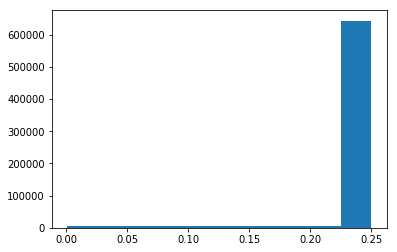

In [65]:
col = 'Interval Duration (Secs)'
plot_hist(data, col, bins=10, transform=lambda x: x/3600)

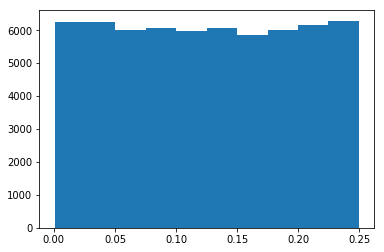

In [66]:
col = 'Interval Duration (Secs)'
plot_hist(data, col, bins=10, filter_fun=lambda x: x<(15*60), transform=lambda x: x/3600)

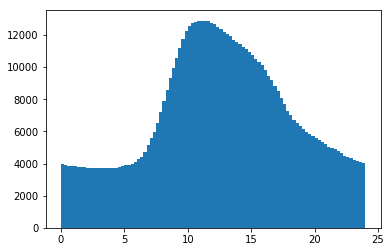

In [67]:
col = 'start_time_seconds'
# plot_hist(data, col, bins=60)
plot_hist(data, col, bins=96, transform=lambda x: x/3600)

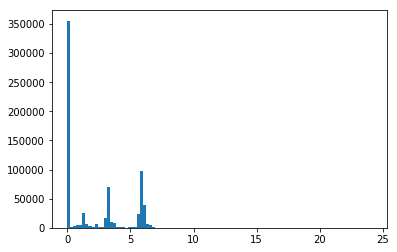

In [68]:
col = 'Peak Power'
plot_hist(data, col, bins=100)

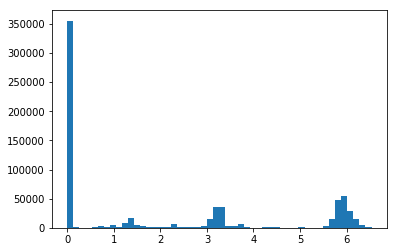

In [69]:
col = 'Peak Power'
plot_hist(data, col, bins=50, percentile=99)

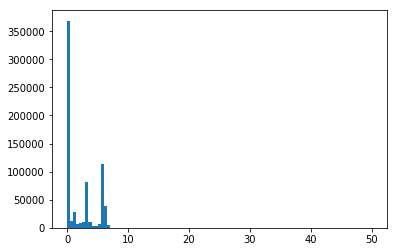

In [70]:
col = 'Average Power'
plot_hist(data, col, bins=100)

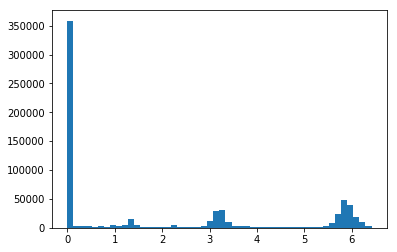

In [71]:
col = 'Average Power'
plot_hist(data, col, bins=50, percentile=99, filter_fun=lambda x: x>=0)

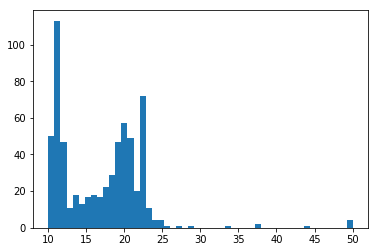

In [72]:
col = 'Average Power'
plot_hist(data, col, bins=50, filter_fun=lambda x: x>=10)

In [79]:
# col = 'Average Power'
# plot_hist(data, col, bins=10, filter_fun=lambda x: x<0)

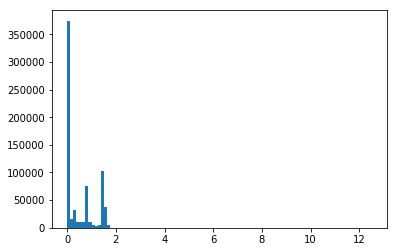

In [74]:
col = 'Interval Energy'
plot_hist(data, col, bins=100)

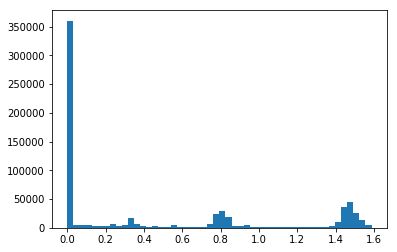

In [75]:
col = 'Interval Energy'
plot_hist(data, col, bins=50, percentile=99, filter_fun=lambda x: x>=0)

In [78]:
# col = 'Interval Energy'
# plot_hist(data, col, bins=10, filter_fun=lambda x: x<0)

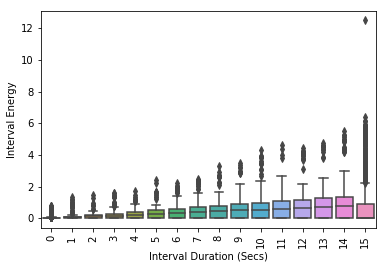

In [77]:
col1 = 'Interval Duration (Secs)'
col2 = 'Interval Energy'

df = data.copy(deep=True)
df[col1] = df[col1].apply(lambda x: x//60)

ax = sns.boxplot(x=col1, y=col2, data=df)
ax = plt.setp(ax.get_xticklabels(), rotation=90)

# Session Characteristics

In [82]:
df = data.copy(deep=True)
session_counts = df["Session ID"].value_counts()
# print(session_counts.head(10))
# print(session_counts.tail(10))

In [83]:
def plot_hist_series(data, percentile=None, bins=50, transform=None, filter_fun=None):
    df = data.copy(deep=True)
    if percentile is not None:
        df = df[df < np.percentile(df, percentile)]
    if filter_fun is not None:
        df = df[df.apply(filter_fun)]
    if transform is not None:
        df = df.apply(transform)
    plot = plt.hist(df, bins=bins)

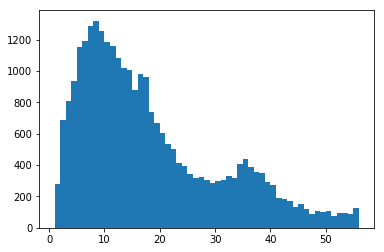

In [110]:
# plot_hist_series(session_counts) #, percentile=None, bins=50, transform=None, filter_fun=None)
plot_hist_series(session_counts, percentile=95, bins=55) 

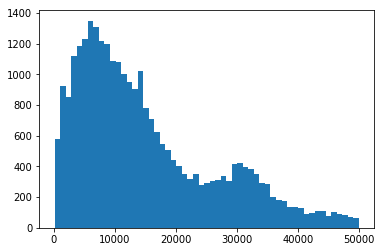

In [111]:
df = data.copy(deep=True)
df = df.groupby('Session ID')
df = df['Interval Duration (Secs)'].agg('sum')
plot_hist_series(df, percentile=95, bins=55) 

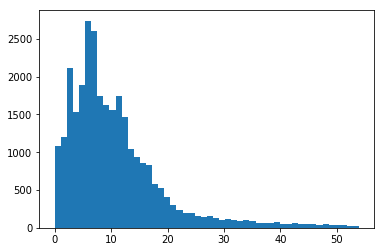

In [114]:
df = data.copy(deep=True)
df = df.groupby('Session ID')
df = df['Interval Energy'].agg('sum')
plot_hist_series(df, percentile=99, bins=50) 

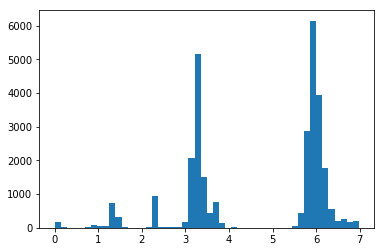

In [115]:
df = data.copy(deep=True)
df = df.groupby('Session ID')
df = df['Peak Power'].agg('max')
plot_hist_series(df, percentile=99, bins=50) 